# **DEEP LEARNING**

The problem is to convert from Celsius to Fahrenheit, where the approximate formula is:

Here, will give TensorFlow some sample Celsius values and their corresponding Fahrenheit values. Then, we will train a model that figures out the above formula through the training process.

# **Importing the libraries.**

In [91]:
#for building the model
import tensorflow as tf

In [92]:
#for creating array in python and doing computation
import numpy as np

# import logging
# logger = tf.get_logger()
# logger.setLevel(logging.ERROR)

# **Set up training data**

For simplification, we will be using numpy to create a simple training data, later, we will be importing data directly from tensorflow. we create two arrays celsius_q and fahrenheit_a that we can use to train our model.

In [93]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22, 38, 45,55],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100, 113,131],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit
45.0 degrees Celsius = 113.0 degrees Fahrenheit
55.0 degrees Celsius = 131.0 degrees Fahrenheit


**Some Machine Learning terminology**

**Feature** — The input(s) to our model. In this case, a single value — the degrees in Celsius.

**Labels** — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.

**Example** — A pair of inputs/outputs used during training. In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22,72).

# **Creating The Model**

We will be using the simplest possible model called Dense Network, since the problem is very straightforward. This network requires only single layer, with single neuron.

We’ll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:


**input_shape=[1]** — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

**units=1** — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.) Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

In [94]:
#creating a model
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# **Assembling layers into the model:**

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0

In [95]:
#assembling layers into the model
model = tf.keras.Sequential([l0])

# **Compiling and Training the model**

Before training, the model has to be compiled. When compiled for training, the model is given:

**Loss function** — A way of measuring how far off predictions are from the desired outcome. 

**Optimizer function** — A way of adjusting internal values in order to reduce the loss.

The optimizer and the loss function can be change pending on the need. This will be explain very well in the next article. One part of the Optimizer you may need to think about when building your own models is the learning rate . This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces. We call the fit method to train a model in machine learning


In [96]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [97]:
history = model.fit(celsius_q, fahrenheit_a, epochs=800, verbose=False)
print("Finished training the model")

Finished training the model


# **Display training statistics**

Visualizing loss magnitude

We visualize the loss magnitude so we can see how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit_a. 

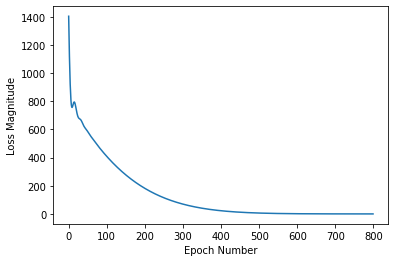

In [98]:
import matplotlib.pyplot as plt
#displaying train statistics
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# **Making Prediction**

Now we have a model that has been trained to learn the relationship between celsius_q and fahrenheit_a.We can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees. Now let’s find the value of Fahrenheit degree if Celsius degree is 100. Using the equation we derived at the beginning of this lesson Fahrenheit(F) = 100 *1.8 +32 = 212. Now let see what our model predicts.

In [99]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 44ms/step
[[212.02216]]


Now we build a machine learning model that can convert Celsius degree to Fahrenheit degree.

The correct answer is 100 * 1.8 + 32 = 212. We got exactly the same while predicting,so our model is doing really well.

# **Finding the weight and bias**

In [100]:
print("layer variables:{}".format(l0.get_weights()))

layer variables:[array([[1.8028668]], dtype=float32), array([31.73548], dtype=float32)]


Here, the first variable is equal to 1.8 and the second is equal to 32 if we round off them.
Theses valuse are really close to the values in the conversion formula. 


Thus,We created a good model with a Dense layer


We trained it with 7200 examples (9 pairs, over 800 epochs).(Here, Initially I started with 7 pairs of data and used 500 epochs.But I found that the predicted value is not very close to correct value. So, I improved the model accuracy by adding datas and also increasing the epochs)


Then predicted it with good accuracy